<a href="https://colab.research.google.com/github/GabrielleBrihn/statsfinal/blob/main/Logistic_Regression_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
mydata <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/master/MedSchoolApplicants.csv',
                    stringsAsFactors = TRUE)


In [5]:
names(mydata)
head(mydata)

[1] "Accept"      "Accept_code" "Sex"         "BCPM"        "GPA"        
 [6] "VR"          "PS"          "WS"          "BS"          "MCAT"       
[11] "Apps"

,Accept,Accept_code,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


## This is the HW for Thursday!  

The goal is to build a model to predict the acceptance to medical school based pn servaral predictors.

The Medical College Admissions Test (MCAT) has four sections:
- Verbal Reasoning (VR)
- Physical Sciences (PS)
- Biological Sciences (BS)
- Writing Sample (WS)

Q1: Explore the distribution of GPA values for Accepted and Denied candidates


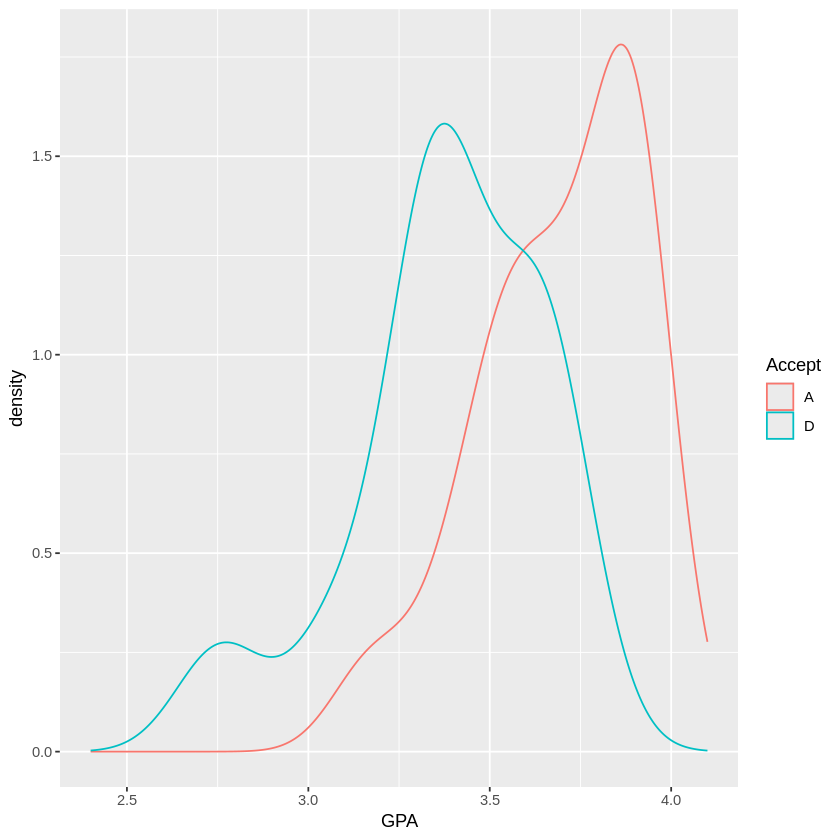

In [6]:
mydata %>%
  ggplot() +
  aes( x = GPA, col = Accept) +
  geom_density() +
  xlim(c(2.4,4.1))

Q2: Explore the distribution of MCAT values for cccepted and denied candidates.





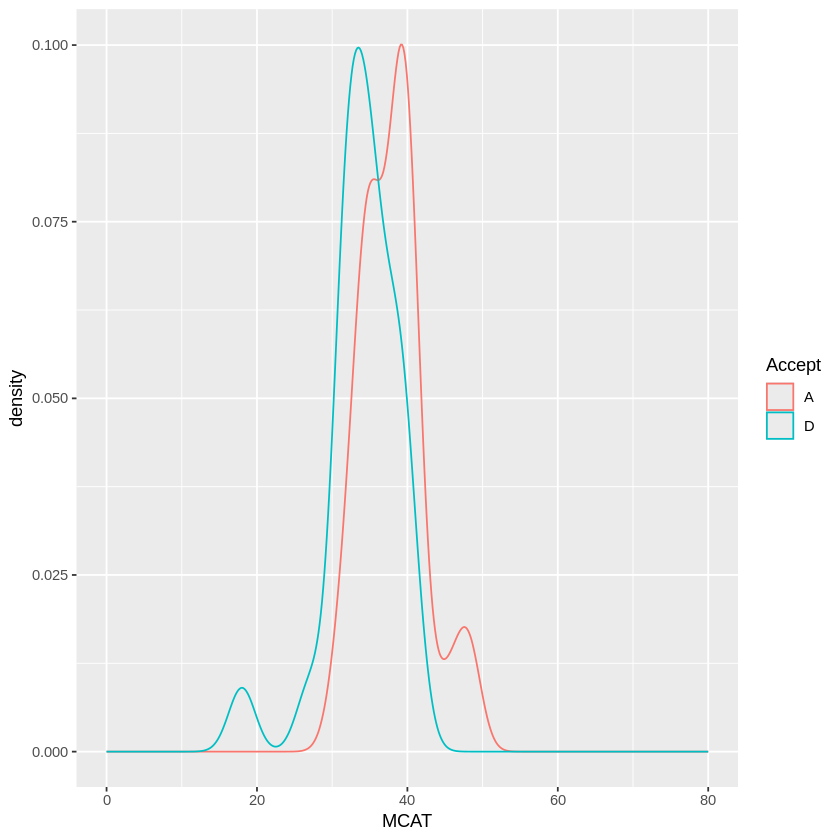

In [12]:
mydata %>%
  ggplot() +
  aes(x = MCAT, col = Accept) +
  geom_density() +
  xlim(c(0, 80))

Q3: Explore the distribution of number of applications submitted for Accepted and Denied candidates



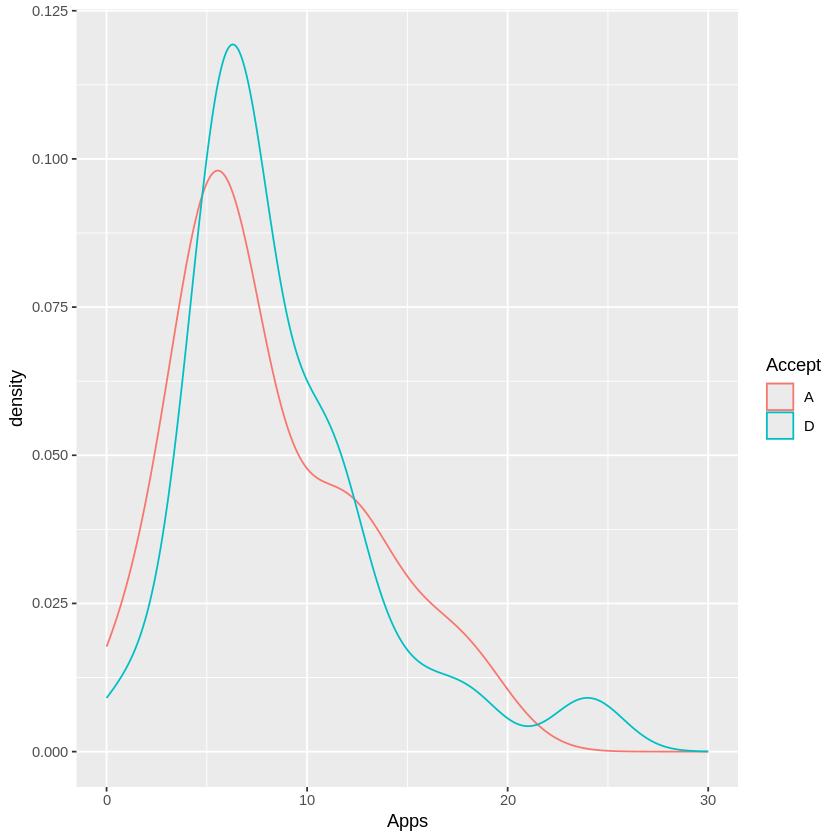

In [14]:
mydata %>%
  ggplot() +
  aes(x = Apps, col = Accept) +
  geom_density() +
  xlim(c(0, 30))



```
`# This is formatted as code`
```

Q4: Is there a correlation beteween GPA values and MCAT values for Accepted and Denied candidates?  
**Hint:** Use a scatterplot.

Q5: Is this relationship similar(or different) for males and females.  
**Hint:** Use facets.


`geom_smooth()` using formula = 'y ~ x'


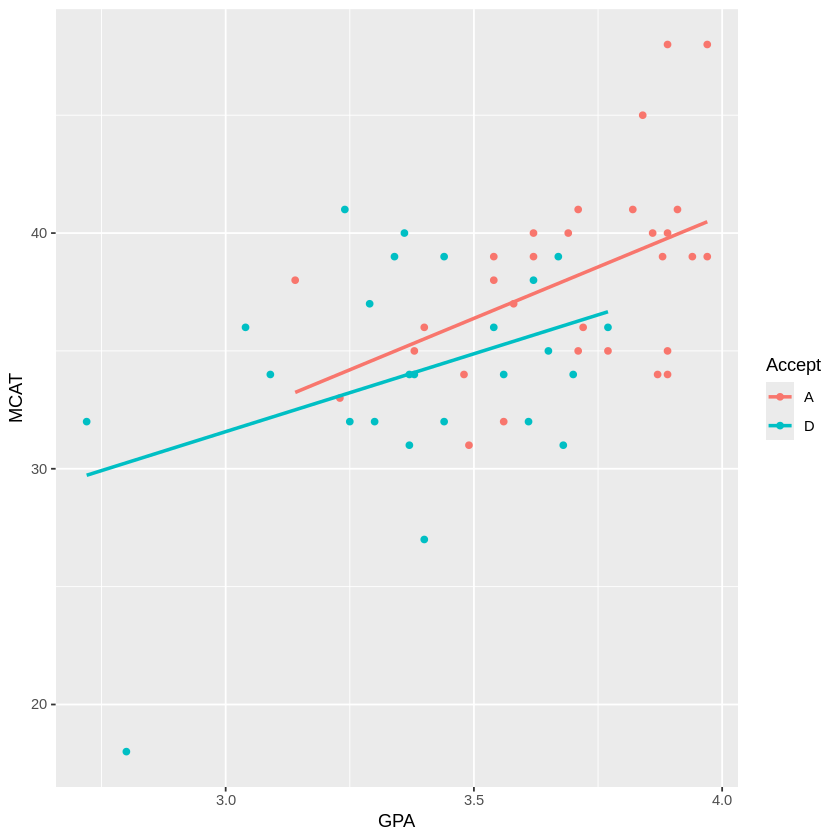

# A tibble: 2 × 2
  Sex   correlation
  <fct>       <dbl>
1 F           0.510
2 M           0.562


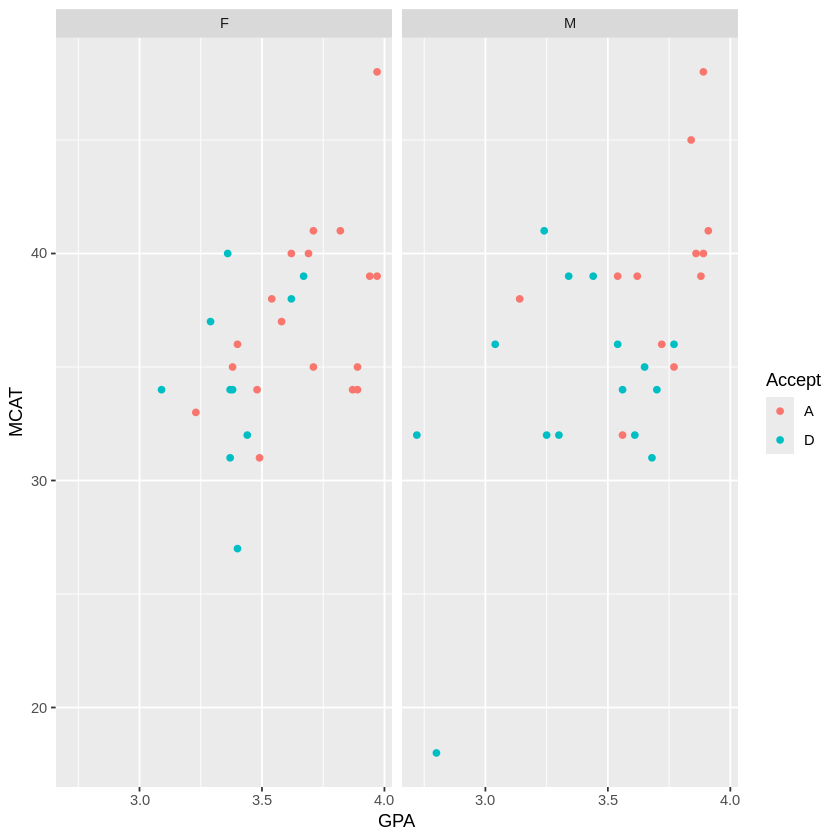

In [19]:
# Q4
mydata %>%
  ggplot(aes(x = GPA, y = MCAT, col = Accept)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, aes(col = Accept))


# Q5
mydata %>%
  ggplot() +
  aes(x = GPA, y = MCAT, col = Accept) +
  geom_point() +
  facet_wrap(~Sex)

correlation_by_sex <- mydata %>%
  group_by(Sex) %>%
  summarise(correlation = cor(GPA, MCAT))

print(correlation_by_sex)

 Q6: Draw a plot to explore the relationship between GPA and acceptance.  Add the logistic regression curve into the plot.

`geom_smooth()` using formula = 'y ~ x'


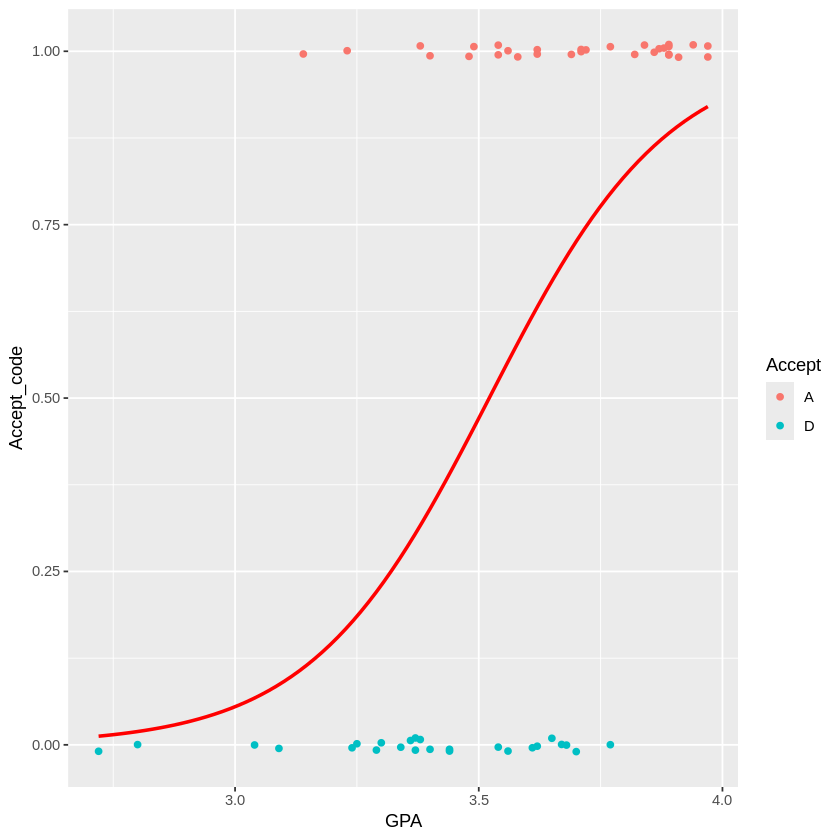

In [7]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)


Q7: Is the probability of acceptance based on GPA is similar(or different) for

---

males and females?

`geom_smooth()` using formula = 'y ~ x'


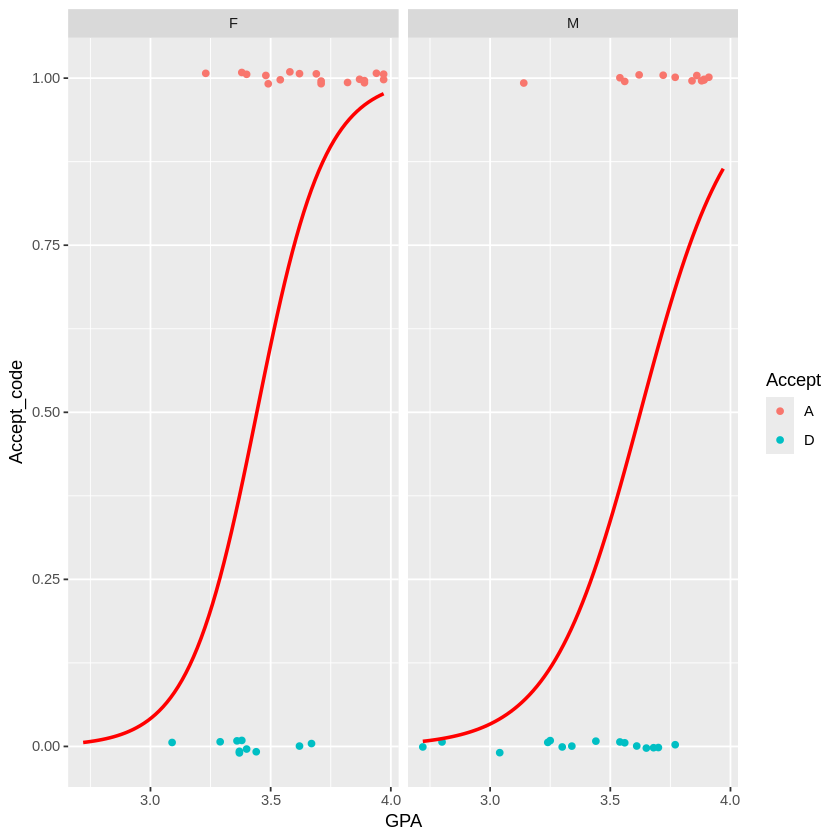

In [25]:
mydata %>%
  ggplot(aes(x = GPA, y = Accept_code, col = Accept)) +
  geom_jitter(height = 0.01, width = 0) +  # Scatter plot with jitter
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE,
              col = 'red',
              fullrange = TRUE) +  # Logistic regression line
  facet_wrap(~Sex)

In [30]:
model1 <- glm(Accept_code ~GPA, family = 'binomial', data = mydata)
print(model1)


Call:  glm(formula = Accept_code ~ GPA, family = "binomial", data = mydata)

Coefficients:
(Intercept)          GPA  
    -19.207        5.454  

Degrees of Freedom: 54 Total (i.e. Null);  53 Residual
Null Deviance:	    75.79 
Residual Deviance: 56.84 	AIC: 60.84


In [ ]:
model11 <- glm(Accept_code ~ GPA +Sex + GPA*Sex)
model22 <- glm(Accept_code ~ GPA + Sex)

Q8: Use the `glm()` command to fit a logistic model to predict the acceptance probability usinig `GPA` and `Sex` as predictors

going to have 2 equations

Q9: Write down equations of the two fitted logistic curves.

Q10: What is the $R^2$ of your model?  Do you see one in your model output?